# FeynML

## Write FeynmanDiagram

Convenient saving and loading of style independent feynman diagrams as XML or FeynML.

In [1]:
from xsdata.formats.dataclass.parsers import XmlParser
from xsdata.formats.dataclass.serializers import XmlSerializer
from xsdata.formats.dataclass.serializers.config import SerializerConfig

from pyfeyn2.feynmandiagram import (
    FeynmanDiagram,
    FeynML,
    Head,
    Leg,
    Meta,
    Propagator,
    Vertex,
)

In [2]:
fd = FeynmanDiagram()
v1 = Vertex("v1")
v2 = Vertex("v2")
p1 = Propagator("p1")
l1 = Leg("l1")
p1.set_source(v1)
p1.set_target(v2)
fd.propagators.append(p1)
fd.vertices.append(v1)
fd.vertices.append(v2)
fd.legs.append(l1)

config = SerializerConfig(pretty_print=True)
serializer = XmlSerializer(config=config)
print(serializer.render(fd))

<?xml version="1.0" encoding="UTF-8"?>
<diagram>
  <propagator id="p1" source="v1" target="v2" pdgid="21" type="" latexname="g" label=""/>
  <vertex id="v1" label=""/>
  <vertex id="v2" label=""/>
  <leg id="l1" target="" pdgid="21" type="" latexname="g" label="" sense=""/>
</diagram>



## Write FeynML

In [3]:
fml = FeynML(
        head=Head(
            metas=Meta(name="pyfeyn2", value="test"),
            description="Simple single test diagram",
        ),
        diagrams=fd,
    )

config = SerializerConfig(pretty_print=True)
serializer = XmlSerializer(config=config)
print(serializer.render(fml))

<?xml version="1.0" encoding="UTF-8"?>
<feynml>
  <head>
    <meta name="pyfeyn2" value="test"/>
    <description>Simple single test diagram</description>
  </head>
  <diagram>
    <propagator id="p1" source="v1" target="v2" pdgid="21" type="" latexname="g" label=""/>
    <vertex id="v1" label=""/>
    <vertex id="v2" label=""/>
    <leg id="l1" target="" pdgid="21" type="" latexname="g" label="" sense=""/>
  </diagram>
</feynml>



## Read FeynML

FeynML(head=[Head(metas=[Meta(name='creator', value='PyFeyn')], description='\n   A sample diagram showing a QCD correction to the Drell-Yan process.\n   ')], diagrams=[FeynmanDiagram(propagators=[Propagator(id='P2', source='V0', target='V1', bend=None, pdgid=21, type='photon', latexname='g', style=None, label='Z'), Propagator(id='P4', source='V5', target='V1', bend=None, pdgid=21, type='fermion', latexname='g', style=None, label=''), Propagator(id='P5', source='V1', target='V6', bend=None, pdgid=21, type='fermion', latexname='g', style=None, label=''), Propagator(id='P7', source='V5', target='V6', bend=0.5, pdgid=21, type='gluon', latexname='g', style='parallel-arrow-displace:0.2;', label='g')], vertices=[Vertex(id='V0', x=-2.0, y=0.0, z=None, style=None, label=''), Vertex(id='V1', x=2.0, y=0.0, z=None, style=None, label=''), Vertex(id='V5', x=3.0, y=-1.0, z=None, style=None, label=''), Vertex(id='V6', x=3.0, y=1.0, z=None, style=None, label='')], legs=[Leg(id='E0', target='V0', x=-4.

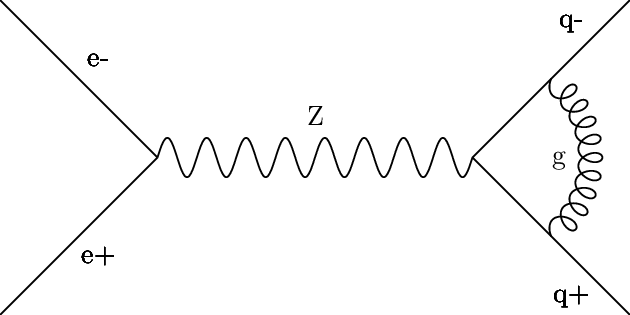

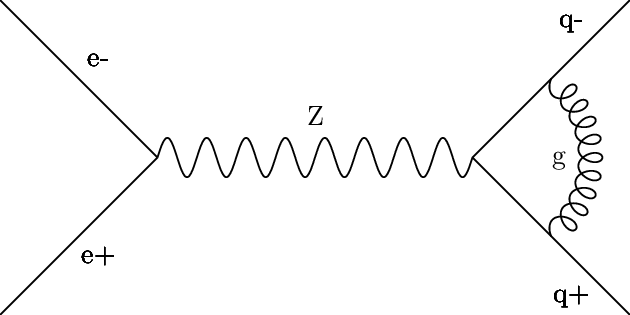

In [4]:
from pathlib import Path
from pyfeyn2.render.pyx.pyxrender import PyxRender

xml_string = Path("test.fml").read_text()
parser = XmlParser()
fml = parser.from_string(xml_string, FeynML)
print(fml)
PyxRender(fml.diagrams[0]).render()